In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Data Loading
import os

In [3]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.max_columns',None)

In [4]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [5]:
df=pd.read_csv(r'C:\04-AIML\10 Hackathon\TVS Credit\Train_Set_TVS.csv')

In [6]:
df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [7]:
# No of rows and the columns
df.shape

(132440, 33)

In [8]:
df.ID = df.ID.astype('str')
df.Default = df.Default.astype('str')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  object 
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  object 
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  object 
 7   Default_hist        132440 non-null  object 
 8   Prop_List           130475 non-null  object 
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  object 
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  object 
 13  Marital_Stat        132440 non-null  object 
 14  Gen                 132440 non-null  object 
 15  Credit_Lnks         132440 non-nul

In [10]:
# what percentage of data is missing in the feature
round(df.isnull().sum(axis=0)/len(df),2)*100

ID                     0.0
Compensation           5.0
Vehicle_Status         7.0
Loan_amt               0.0
Annuity_amt            3.0
density_Ind            4.0
Job_Type               8.0
Default_hist           0.0
Prop_List              1.0
Home_Appliances        8.0
Region_Type            0.0
Credit_Inq             2.0
Education_det          0.0
Marital_Stat           0.0
Gen                    0.0
Credit_Lnks            0.0
Experience            16.0
Income_Alt             6.0
Day_Process            0.0
Ph.No                  0.0
Type_Loan              0.0
Dependents             0.0
Company_Rating         9.0
Region                 0.0
Age                    0.0
hour_Process           0.0
Addr_permanent         0.0
Permanent_Addr_tag     0.0
c1_rated              13.0
c2_rated              10.0
Contact_age            6.0
Product_bought         0.0
Default                0.0
dtype: float64

In [11]:
df['Default'].value_counts()

0.0    97436
1.0    35004
Name: Default, dtype: int64

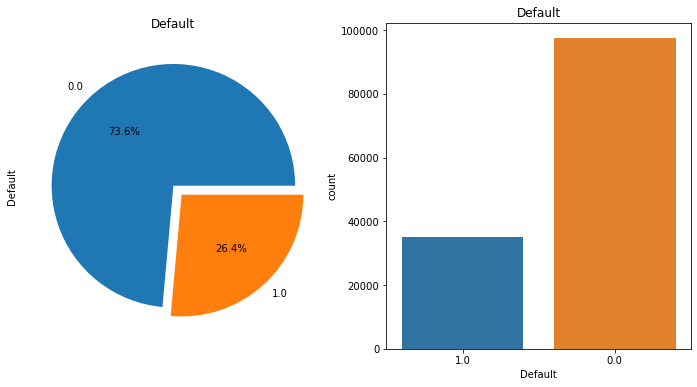

In [12]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
df['Default'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('Default')
sns.countplot('Default',data=df,ax=axes[1])
axes[1].set_title('Default')
plt.show()

In [13]:
df.describe()

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
count,1.261980e+05,1.324400e+05,127829.000000,127024.000000,121476.000000,110595.000000,132440.000000,120709.000000,132440.00000,132440.000000,114927.000000,119119.000000,124287.000000,132440.000000
mean,7.450519e+05,4.148011e+05,10845.286442,0.020446,3.220891,6.580616,2.155467,2.030553,43.93326,12.060865,0.505929,0.506181,979.451383,3.387738
std,4.702762e+05,2.746788e+05,2061.529355,0.015077,1.241751,6.357054,0.909046,0.503750,11.96270,3.566714,0.268665,0.268716,829.632194,2.173246
min,1.527280e+05,3.427500e+04,5852.100000,0.000100,1.000000,0.000000,1.000000,1.000000,21.00000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,5.177060e+05,2.045300e+05,9348.370000,0.010400,2.000000,2.100000,2.000000,2.000000,34.00000,10.000000,0.268000,0.268000,288.000000,2.000000
50%,6.659960e+05,3.495425e+05,10773.820000,0.020400,4.000000,4.600000,2.000000,2.000000,43.00000,12.000000,0.500000,0.500000,770.000000,3.000000
75%,8.794890e+05,5.582050e+05,12165.390000,0.030400,4.000000,9.000000,3.000000,2.000000,54.00000,15.000000,0.769000,0.769000,1589.000000,5.000000
max,7.037702e+07,2.872142e+06,41301.000000,2.017800,19.000000,48.100000,9.000000,3.000000,69.00000,25.000000,0.947000,0.947000,4309.000000,25.000000


In [14]:
def plot_hist_boxplot(column):
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
    sns.distplot(df[df[column].notnull()][column],ax=ax1)
    sns.boxplot(y=df[df[column].notnull()][column],ax=ax2)
    print("skewness : ",skew(df[df[column].notnull()][column]))
    print("kurtosis : ",kurtosis(df[df[column].notnull()][column]))
    plt.show()

In [15]:
def plot_count_boxplot(column):
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
    sns.countplot(df[df[column].notnull()][column],ax=ax1)
    sns.boxplot(y=df[df[column].notnull()][column],ax=ax2)
    print("skewness : ",skew(df[df[column].notnull()][column]))
    print("kurtosis : ",kurtosis(df[df[column].notnull()][column]))
    plt.show()

In [16]:
num_vars = [var for var in df.columns if df[var].dtypes!= 'O']
print("Total no of numerical variables in the dataset: ", len(num_vars))

Total no of numerical variables in the dataset:  14


In [17]:
cat_vars = [var for var in df.columns if df[var].dtypes == 'O']
print("Total no of categorical variables in the dataset: ", len(cat_vars))

Total no of categorical variables in the dataset:  19


In [18]:
df[num_vars].head()

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0,801850.0,658040.0,13816.52,0.0304,NaN,0.9,3.0,2.0,46.0,10.0,0.077,0.077,18.0,2.0
1,884222.0,198075.0,11173.06,0.0194,1.0,3.0,3.0,1.0,46.0,12.0,0.184,0.184,306.0,4.0
2,284120.0,101056.0,8390.40,0.0118,4.0,NaN,2.0,3.0,57.0,5.0,0.538,0.538,281.0,4.0
3,341874.0,179008.0,7184.13,0.0373,2.0,4.7,4.0,2.0,39.0,12.0,NaN,0.561,20.0,4.0
4,1259895.0,573715.0,13212.77,0.0138,1.0,6.9,3.0,1.0,32.0,16.0,NaN,0.200,2339.0,6.0


In [19]:
df[cat_vars].head()

,ID,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag,Default
0,540071,Y,IT,ndf,Morethan_One,Metro,1,Grad,Married,F,1_to_3,Not_Specified,SAT,Yes,CLoan,East,Yes,No,1.0
1,511643,N,IT,ndf,Morethan_One,Metro,2,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,CLoan,North,Yes,Yes,0.0
2,506688,N,Govt.,ndf,One,Metro,3,Other,Married,M,1_to_3,Not_Specified,mon,Yes,CLoan,North,Yes,Yes,0.0
3,499360,N,Non-IT,df,None,Metro,1,Grad,Married,M,1_to_3,Not_Specified,wed,Yes,RLoan,South,Yes,Yes,0.0
4,438350,Y,Non-IT,ndf,Morethan_One,Rural,2,Grad,Married,F,4_to_6,Y,Sun,Yes,CLoan,North,Yes,Yes,0.0


In [20]:
for var in cat_vars:
    print(var, len(df[var].unique()), " Categories")

ID 132440  Categories
Vehicle_Status 3  Categories
Job_Type 4  Categories
Default_hist 2  Categories
Prop_List 4  Categories
Region_Type 3  Categories
Credit_Inq 5  Categories
Education_det 3  Categories
Marital_Stat 4  Categories
Gen 2  Categories
Credit_Lnks 3  Categories
Income_Alt 3  Categories
Day_Process 7  Categories
Ph.No 2  Categories
Type_Loan 2  Categories
Region 4  Categories
Addr_permanent 2  Categories
Permanent_Addr_tag 2  Categories
Default 2  Categories


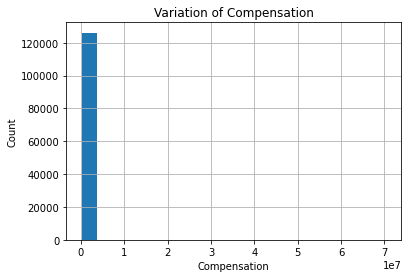

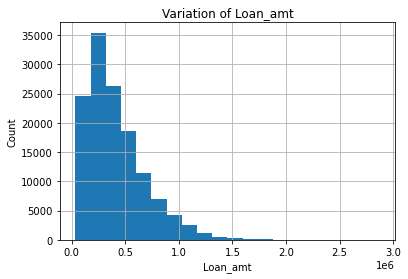

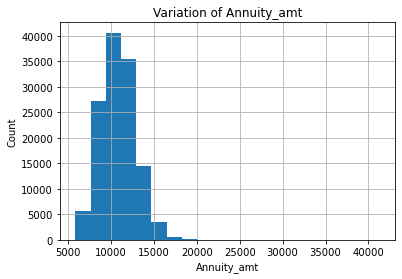

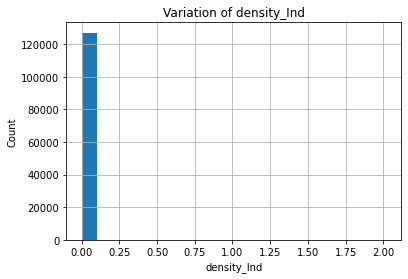

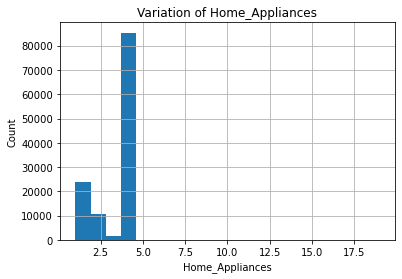

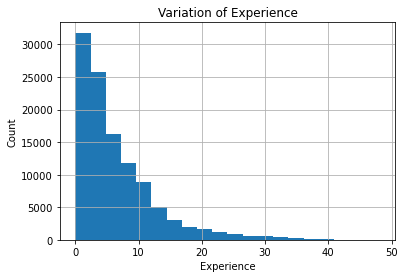

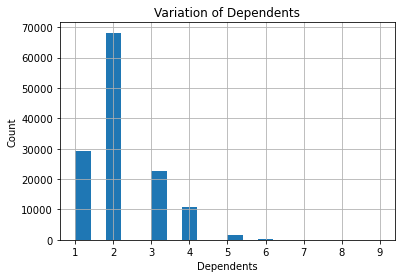

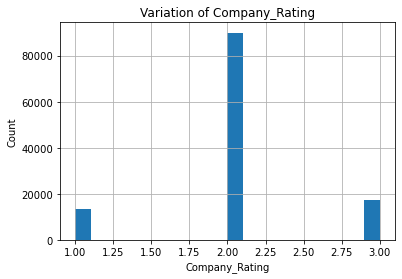

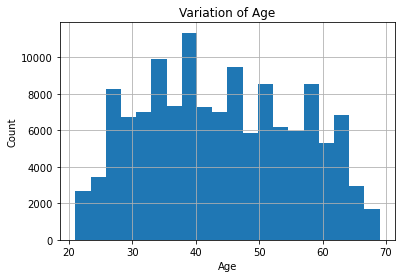

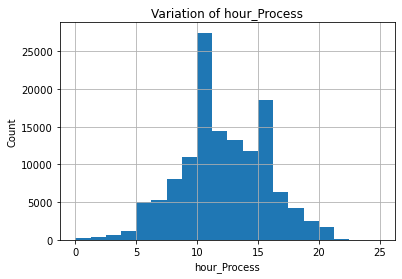

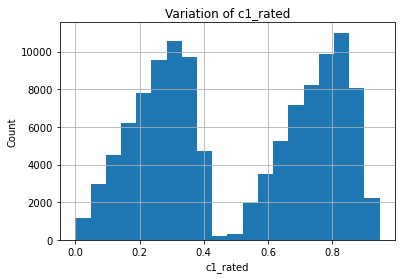

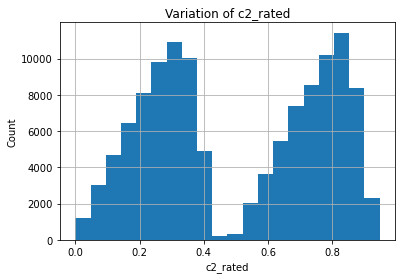

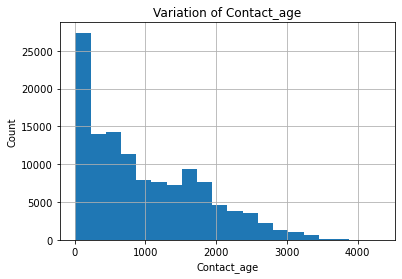

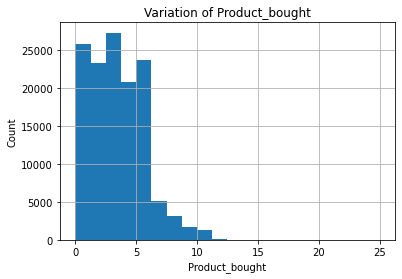

In [21]:
def analyze_cont_vars(df,var):
    new_df = df.copy()
    new_df[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()

for var in num_vars:
    analyze_cont_vars(df,var)

In [22]:
skewness  = [] ; kurt = []
for column in num_vars:
    skewness.append(skew(df[df[column].notnull()][column]))
    kurt.append(kurtosis(df[df[column].notnull()][column]))
    
stats = pd.DataFrame({'Skewness' : skewness, 'Kurtosis' : kurt},index=[col for col in num_vars])
stats.sort_values(by=['Skewness'], ascending=False)

,Skewness,Kurtosis
density_Ind,54.453453,7192.457604
Compensation,50.103002,6484.586891
Experience,1.939678,4.700153
Loan_amt,1.375237,2.546941
Dependents,0.886558,1.039771
Product_bought,0.798952,1.084477
Contact_age,0.714693,-0.317201
Annuity_amt,0.672764,2.940973
Age,0.118173,-1.045742
Company_Rating,0.056832,0.919329


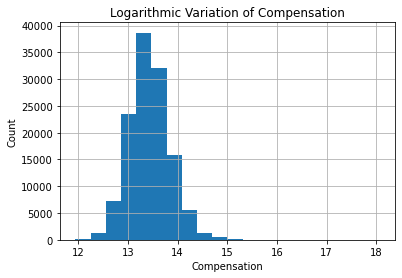

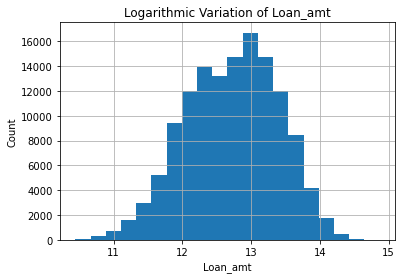

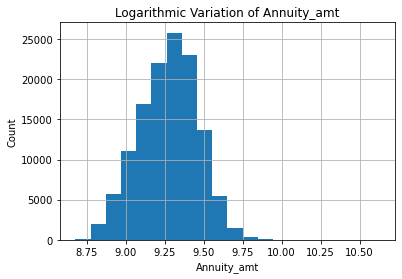

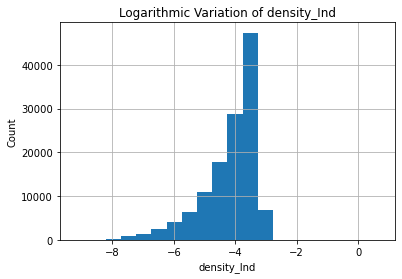

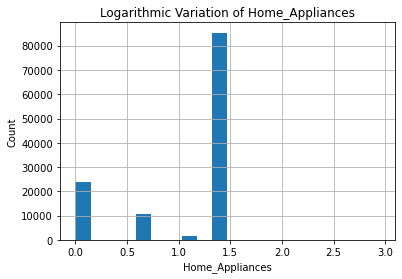

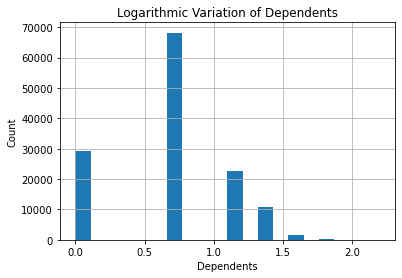

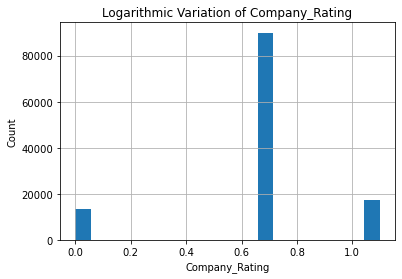

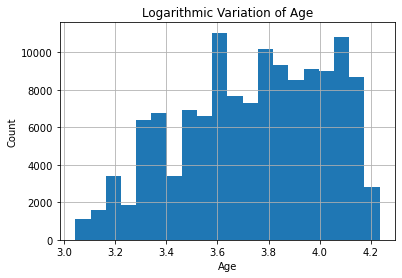

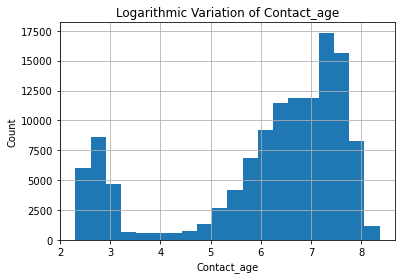

In [23]:
def analyze_log_variation(df,var):
    new_df = df.copy()
    if 0 in new_df[var].unique():
        pass
    else:
         #log Transformation of variables
        new_df[var] = np.log(new_df[var])
        new_df[var].hist(bins=20)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title('Logarithmic Variation of '+ var)
        plt.show()

for var in num_vars:
    analyze_log_variation(df,var)

In [24]:
duplicate = df[df.duplicated('ID')]

In [25]:
mis_val = [var for var in df.columns if df[var].isnull().sum()>0]
df[mis_val].isnull().sum()

Compensation        6242
Vehicle_Status      9104
Annuity_amt         4611
density_Ind         5416
Job_Type           10248
Prop_List           1965
Home_Appliances    10964
Credit_Inq          2690
Experience         21845
Income_Alt          7682
Company_Rating     11731
c1_rated           17513
c2_rated           13321
Contact_age         8153
dtype: int64

In [26]:
num_vars

['Compensation',
 'Loan_amt',
 'Annuity_amt',
 'density_Ind',
 'Home_Appliances',
 'Experience',
 'Dependents',
 'Company_Rating',
 'Age',
 'hour_Process',
 'c1_rated',
 'c2_rated',
 'Contact_age',
 'Product_bought']

In [27]:
df['Compensation'].fillna(df['Compensation'].median(), inplace=True)
df['Annuity_amt'].fillna(df['Annuity_amt'].median(), inplace=True)
df['density_Ind'].fillna(df['density_Ind'].median(), inplace=True)
df['Home_Appliances'].fillna(df['Home_Appliances'].median(), inplace=True)
df['Experience'].fillna(df['Experience'].median(), inplace=True)
df['c1_rated'].fillna(df['c1_rated'].median(), inplace=True)
df['c2_rated'].fillna(df['c2_rated'].median(), inplace=True)
df['Contact_age'].fillna(df['Contact_age'].median(), inplace=True)
df['Company_Rating'].fillna(df['Company_Rating'].median(), inplace=True)

In [28]:
cat_vars = [var for var in df.columns if df[var].dtypes=='O']
cat_vars

['ID',
 'Vehicle_Status',
 'Job_Type',
 'Default_hist',
 'Prop_List',
 'Region_Type',
 'Credit_Inq',
 'Education_det',
 'Marital_Stat',
 'Gen',
 'Credit_Lnks',
 'Income_Alt',
 'Day_Process',
 'Ph.No',
 'Type_Loan',
 'Region',
 'Addr_permanent',
 'Permanent_Addr_tag',
 'Default']

In [29]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 
df['Vehicle_Status']= label_encoder.fit_transform(df['Vehicle_Status'])
df['Job_Type']= label_encoder.fit_transform(df['Job_Type'])
df['Default_hist']= label_encoder.fit_transform(df['Default_hist'])
df['Prop_List']= label_encoder.fit_transform(df['Prop_List'])
df['Region_Type']= label_encoder.fit_transform(df['Region_Type'])
df['Credit_Inq']= label_encoder.fit_transform(df['Credit_Inq'])
df['Education_det']= label_encoder.fit_transform(df['Education_det'])
df['Marital_Stat']= label_encoder.fit_transform(df['Marital_Stat'])
df['Gen']= label_encoder.fit_transform(df['Gen'])
df['Credit_Lnks']= label_encoder.fit_transform(df['Credit_Lnks'])
df['Income_Alt']= label_encoder.fit_transform(df['Income_Alt'])
df['Day_Process']= label_encoder.fit_transform(df['Day_Process'])
df['Ph.No']= label_encoder.fit_transform(df['Ph.No'])
df['Type_Loan']= label_encoder.fit_transform(df['Type_Loan'])
df['Region']= label_encoder.fit_transform(df['Region'])
df['Addr_permanent']= label_encoder.fit_transform(df['Addr_permanent'])
df['Permanent_Addr_tag']= label_encoder.fit_transform(df['Permanent_Addr_tag'])
df['Default']= label_encoder.fit_transform(df['Default'])

In [30]:
df.isnull().sum()

ID                    0
Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Day_Process           0
Ph.No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
Default               0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  object 
 1   Compensation        132440 non-null  float64
 2   Vehicle_Status      132440 non-null  int32  
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         132440 non-null  float64
 5   density_Ind         132440 non-null  float64
 6   Job_Type            132440 non-null  int32  
 7   Default_hist        132440 non-null  int32  
 8   Prop_List           132440 non-null  int32  
 9   Home_Appliances     132440 non-null  float64
 10  Region_Type         132440 non-null  int32  
 11  Credit_Inq          132440 non-null  int32  
 12  Education_det       132440 non-null  int32  
 13  Marital_Stat        132440 non-null  int32  
 14  Gen                 132440 non-null  int32  
 15  Credit_Lnks         132440 non-nul

In [32]:
df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,1,658040.0,13816.52,0.0304,1,1,0,4.0,0,0,0,1,0,0,0.9,0,1,1,0,3.0,2.0,1,46.0,10.0,1,0,0.077,0.077,18.0,2.0,1
1,511643,884222.0,0,198075.0,11173.06,0.0194,1,1,0,1.0,0,1,0,1,1,0,3.0,0,6,1,0,3.0,1.0,2,46.0,12.0,1,1,0.184,0.184,306.0,4.0,0
2,506688,284120.0,0,101056.0,8390.40,0.0118,0,1,2,4.0,0,2,1,1,1,0,4.6,0,4,1,0,2.0,3.0,2,57.0,5.0,1,1,0.538,0.538,281.0,4.0,0
3,499360,341874.0,0,179008.0,7184.13,0.0373,2,0,1,2.0,0,0,0,1,1,0,4.7,0,6,1,1,4.0,2.0,3,39.0,12.0,1,1,0.500,0.561,20.0,4.0,0
4,438350,1259895.0,1,573715.0,13212.77,0.0138,2,1,0,1.0,1,1,0,1,0,1,6.9,1,2,1,0,3.0,1.0,2,32.0,16.0,1,1,0.500,0.200,2339.0,6.0,0


In [33]:
df.to_csv(r'C:\04-AIML\10 Hackathon\TVS Credit\trainclean.csv')

In [34]:
df_test=pd.read_csv(r'C:\04-AIML\10 Hackathon\TVS Credit\Test_Set_TVS.csv')

In [35]:
df_test.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,5.4,Not_Specified,thur,Yes,CLoan,3.0,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,2.3,Y,wed,No,CLoan,2.0,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,Rural,1,Grad,Married,M,1_to_3,11.0,Y,thur,No,CLoan,3.0,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,9.7,Y,Tue,Yes,CLoan,2.0,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,Metro,3,P_Grad,Married,F,1_to_3,NaN,Y,wed,Yes,RLoan,2.0,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


In [36]:
# No of rows and the columns
df_test.shape

(56760, 32)

In [37]:
df_test.ID = df_test.ID.astype('str')

In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  56760 non-null  object 
 1   Compensation        54010 non-null  float64
 2   Vehicle_Status      52877 non-null  object 
 3   Loan_amt            56760 non-null  float64
 4   Annuity_amt         54797 non-null  float64
 5   density_Ind         54485 non-null  float64
 6   Job_Type            52440 non-null  object 
 7   Default_hist        56760 non-null  object 
 8   Prop_List           55849 non-null  object 
 9   Home_Appliances     52001 non-null  float64
 10  Region_Type         56760 non-null  object 
 11  Credit_Inq          55594 non-null  object 
 12  Education_det       56760 non-null  object 
 13  Marital_Stat        56760 non-null  object 
 14  Gen                 56760 non-null  object 
 15  Credit_Lnks         56760 non-null  object 
 16  Expe

In [39]:
df_test.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,5.4,Not_Specified,thur,Yes,CLoan,3.0,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,2.3,Y,wed,No,CLoan,2.0,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,Rural,1,Grad,Married,M,1_to_3,11.0,Y,thur,No,CLoan,3.0,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,9.7,Y,Tue,Yes,CLoan,2.0,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,Metro,3,P_Grad,Married,F,1_to_3,NaN,Y,wed,Yes,RLoan,2.0,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


In [40]:
# what percentage of data is missing in the feature
round(df_test.isnull().sum(axis=0)/len(df_test),2)*100

ID                     0.0
Compensation           5.0
Vehicle_Status         7.0
Loan_amt               0.0
Annuity_amt            3.0
density_Ind            4.0
Job_Type               8.0
Default_hist           0.0
Prop_List              2.0
Home_Appliances        8.0
Region_Type            0.0
Credit_Inq             2.0
Education_det          0.0
Marital_Stat           0.0
Gen                    0.0
Credit_Lnks            0.0
Experience            16.0
Income_Alt             6.0
Day_Process            0.0
Ph.No                  0.0
Type_Loan              0.0
Dependents             0.0
Company_Rating         9.0
Region                 0.0
Age                    0.0
hour_Process           0.0
Addr_permanent         0.0
Permanent_Addr_tag     0.0
c1_rated              13.0
c2_rated              10.0
Contact_age            6.0
Product_bought         0.0
dtype: float64

In [41]:
df_test.describe()

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
count,5.401000e+04,5.676000e+04,54797.000000,54485.000000,52001.000000,47409.000000,56760.000000,51707.000000,56760.000000,56760.000000,49397.000000,51105.000000,53238.00000,56760.000000
mean,7.423110e+05,4.145631e+05,10832.334840,0.020465,3.220688,6.590278,2.150828,2.028487,43.944327,12.079299,0.505408,0.506154,971.82118,3.399683
std,3.764809e+05,2.759849e+05,2060.269444,0.016790,1.240932,6.284459,0.909028,0.505052,11.979557,3.554178,0.268413,0.268316,825.51022,2.174527
min,1.483300e+05,3.477750e+04,6061.610000,0.000000,1.000000,0.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,10.00000,0.000000
25%,5.162055e+05,2.035587e+05,9344.360000,0.010400,2.000000,2.200000,2.000000,2.000000,34.000000,10.000000,0.268000,0.269000,284.00000,2.000000
50%,6.667440e+05,3.488628e+05,10756.450000,0.020300,4.000000,4.600000,2.000000,2.000000,43.000000,12.000000,0.431000,0.500000,767.00000,3.000000
75%,8.770300e+05,5.598608e+05,12142.340000,0.030500,4.000000,9.000000,3.000000,2.000000,54.000000,15.000000,0.769000,0.769000,1579.00000,5.000000
max,1.727617e+07,2.743640e+06,38116.000000,2.037200,19.000000,48.100000,9.000000,3.000000,69.000000,25.000000,0.941000,0.941000,4109.00000,26.000000


In [42]:
def plot_hist_boxplot(column):
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,5))
    sns.distplot(df_test[df_test[column].notnull()][column],ax=ax1)
    sns.boxplot(y=df_test[df_test[column].notnull()][column],ax=ax2)
    print("skewness : ",skew(df_test[df_test[column].notnull()][column]))
    print("kurtosis : ",kurtosis(df_test[df_test[column].notnull()][column]))
    plt.show()

In [43]:
def plot_count_boxplot(column):
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(12,6))
    sns.countplot(df_test[df_test[column].notnull()][column],ax=ax1)
    sns.boxplot(y=df_test[df_test[column].notnull()][column],ax=ax2)
    print("skewness : ",skew(df_test[df_test[column].notnull()][column]))
    print("kurtosis : ",kurtosis(df_test[df_test[column].notnull()][column]))
    plt.show()

In [44]:
num_vars = [var for var in df_test.columns if df_test[var].dtypes!= 'O']
print("Total no of numerical variables in the dataset: ", len(num_vars))

Total no of numerical variables in the dataset:  14


In [45]:
cat_vars = [var for var in df_test.columns if df_test[var].dtypes == 'O']
print("Total no of categorical variables in the dataset: ", len(cat_vars))

Total no of categorical variables in the dataset:  18


In [46]:
df_test[num_vars].head()

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
0,653106.0,809400.00,9145.51,0.0015,1.0,5.4,3.0,2.0,39.0,11.0,0.349,0.349,3133.0,2.0
1,434150.0,72618.75,7683.23,0.0332,4.0,2.3,2.0,3.0,46.0,13.0,0.237,0.237,1730.0,5.0
2,489060.0,267255.80,9032.85,0.0316,NaN,11.0,3.0,2.0,33.0,15.0,0.111,0.111,759.0,4.0
3,957294.0,623600.00,12838.25,0.0320,4.0,9.7,2.0,2.0,48.0,12.0,0.323,0.323,609.0,4.0
4,1333739.0,529520.00,11799.09,0.0073,4.0,NaN,2.0,3.0,53.0,7.0,0.940,0.940,1222.0,1.0


In [47]:
for var in cat_vars:
    print(var, len(df_test[var].unique()), " Categories")

ID 56760  Categories
Vehicle_Status 3  Categories
Job_Type 4  Categories
Default_hist 2  Categories
Prop_List 4  Categories
Region_Type 3  Categories
Credit_Inq 5  Categories
Education_det 3  Categories
Marital_Stat 4  Categories
Gen 2  Categories
Credit_Lnks 3  Categories
Income_Alt 3  Categories
Day_Process 7  Categories
Ph.No 2  Categories
Type_Loan 2  Categories
Region 4  Categories
Addr_permanent 2  Categories
Permanent_Addr_tag 2  Categories


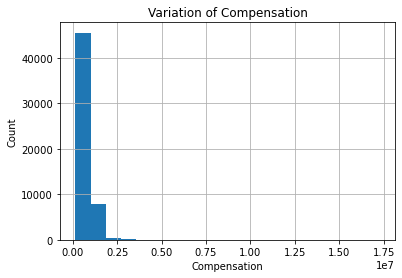

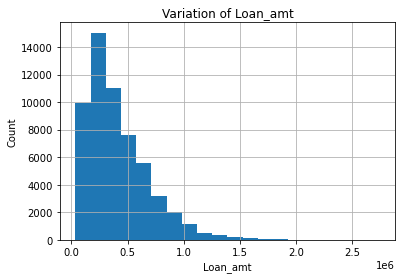

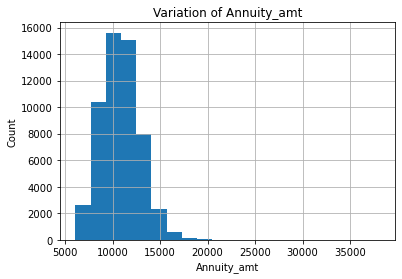

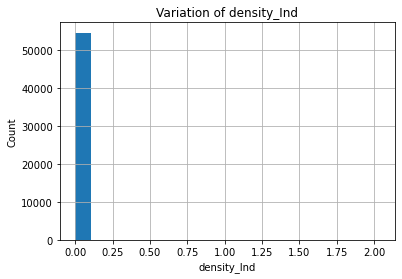

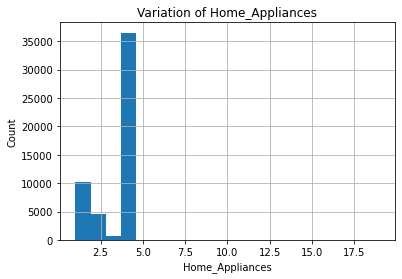

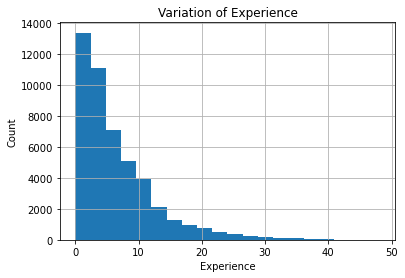

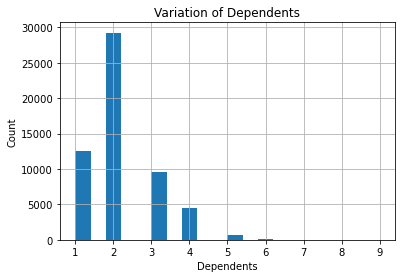

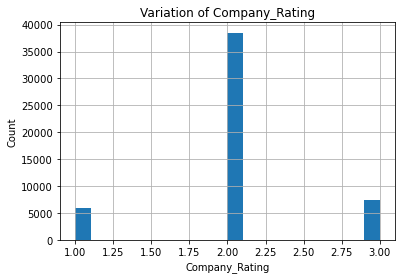

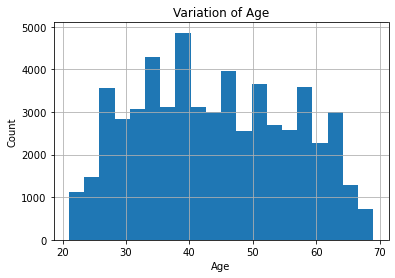

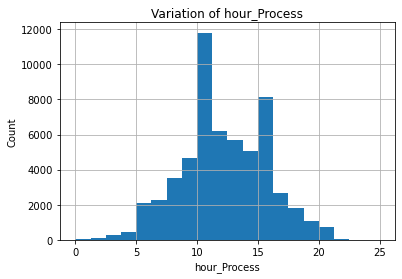

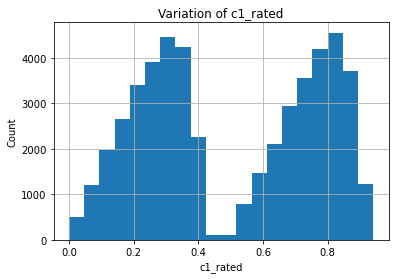

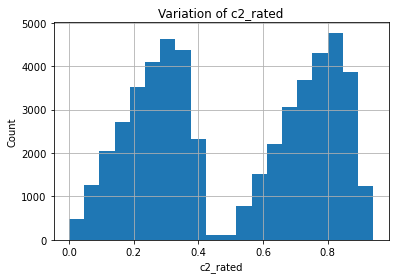

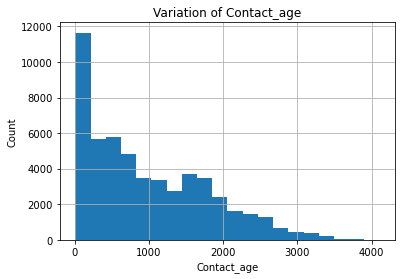

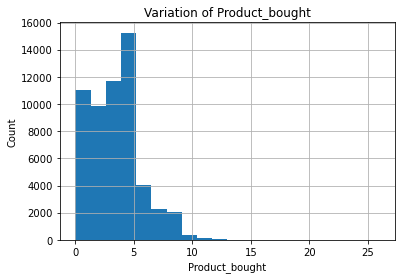

In [48]:
def analyze_cont_vars(df_test,var):
    new_df = df_test.copy()
    new_df[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()

for var in num_vars:
    analyze_cont_vars(df_test,var)

In [49]:
skewness  = [] ; kurt = []
for column in num_vars:
    skewness.append(skew(df_test[df_test[column].notnull()][column]))
    kurt.append(kurtosis(df_test[df_test[column].notnull()][column]))
    
stats = pd.DataFrame({'Skewness' : skewness, 'Kurtosis' : kurt},index=[col for col in num_vars])
stats.sort_values(by=['Skewness'], ascending=False)

,Skewness,Kurtosis
density_Ind,62.902754,7525.585464
Compensation,5.961913,132.129248
Experience,1.914083,4.588299
Loan_amt,1.406812,2.767314
Dependents,0.883975,0.962464
Product_bought,0.795750,1.185570
Annuity_amt,0.728617,3.443220
Contact_age,0.721485,-0.288194
Age,0.118920,-1.051208
Company_Rating,0.051739,0.902153


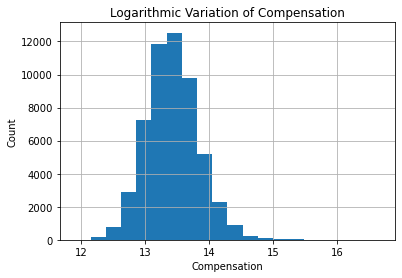

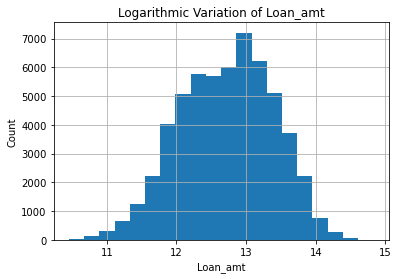

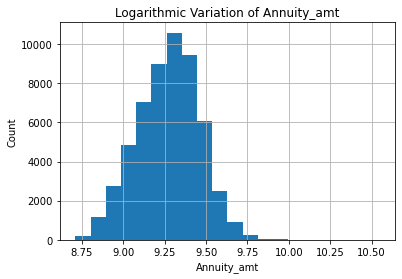

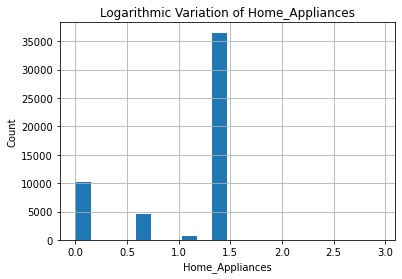

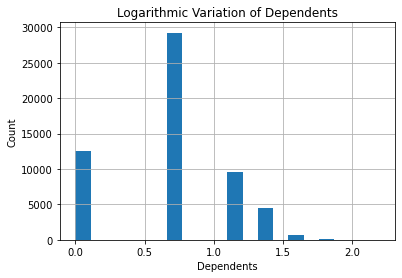

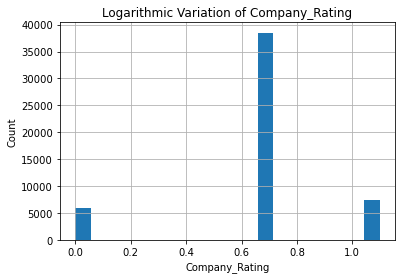

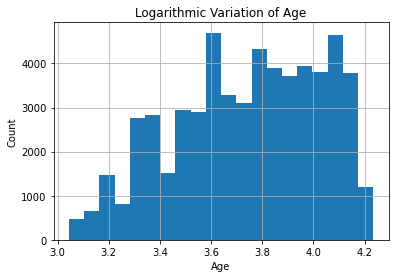

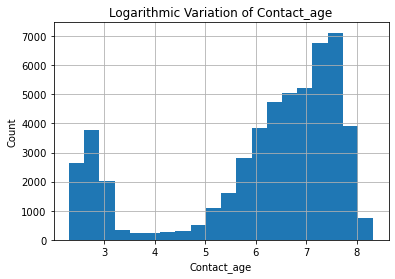

In [50]:
def analyze_log_variation(df_test,var):
    new_df = df_test.copy()
    if 0 in new_df[var].unique():
        pass
    else:
         #log Transformation of variables
        new_df[var] = np.log(new_df[var])
        new_df[var].hist(bins=20)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title('Logarithmic Variation of '+ var)
        plt.show()

for var in num_vars:
    analyze_log_variation(df_test,var)

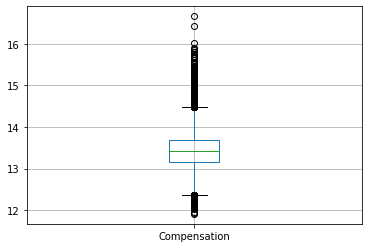

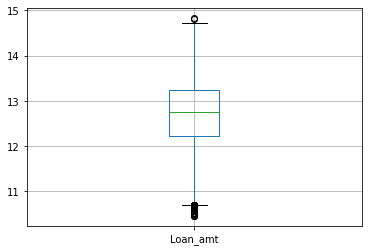

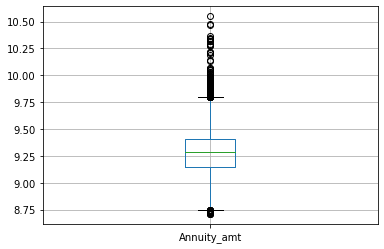

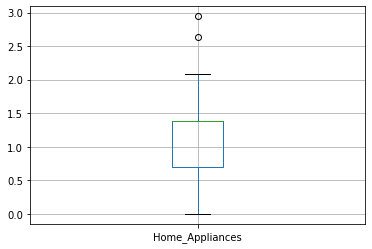

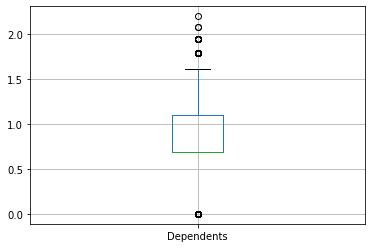

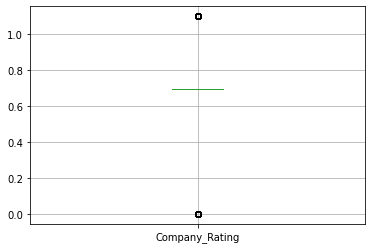

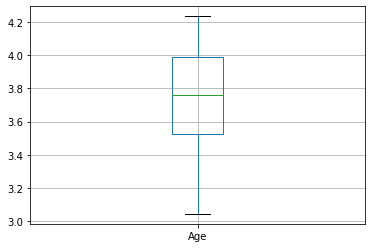

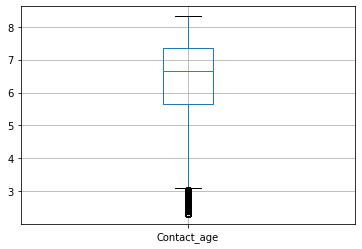

In [51]:
def remove_outliers(df_test,var):
    new_df=df_test.copy()
    if 0 in df_test[var].unique():
        pass
    else:
        df_test[var]=np.log(df_test[var])
        df_test.boxplot(column=var)
        plt.show()

for var in num_vars:
    remove_outliers(df_test,var)

In [52]:
duplicate = df_test[df_test.duplicated('ID')]

In [53]:
mis_val = [var for var in df_test.columns if df_test[var].isnull().sum()>0]
df_test[mis_val].isnull().sum()

Compensation       2750
Vehicle_Status     3883
Annuity_amt        1963
density_Ind        2275
Job_Type           4320
Prop_List           911
Home_Appliances    4759
Credit_Inq         1166
Experience         9351
Income_Alt         3299
Company_Rating     5053
c1_rated           7363
c2_rated           5655
Contact_age        3522
dtype: int64

In [54]:
num_vars

['Compensation',
 'Loan_amt',
 'Annuity_amt',
 'density_Ind',
 'Home_Appliances',
 'Experience',
 'Dependents',
 'Company_Rating',
 'Age',
 'hour_Process',
 'c1_rated',
 'c2_rated',
 'Contact_age',
 'Product_bought']

In [55]:
df_test['Compensation'].fillna(df_test['Compensation'].median(), inplace=True)
df_test['Annuity_amt'].fillna(df_test['Annuity_amt'].median(), inplace=True)
df_test['density_Ind'].fillna(df_test['density_Ind'].median(), inplace=True)
df_test['Home_Appliances'].fillna(df_test['Home_Appliances'].median(), inplace=True)
df_test['Experience'].fillna(df_test['Experience'].median(), inplace=True)
df_test['c1_rated'].fillna(df_test['c1_rated'].median(), inplace=True)
df_test['c2_rated'].fillna(df_test['c2_rated'].median(), inplace=True)
df_test['Contact_age'].fillna(df_test['Contact_age'].median(), inplace=True)
df_test['Company_Rating'].fillna(df_test['Company_Rating'].median(), inplace=True)

In [56]:
cat_vars = [var for var in df_test.columns if df_test[var].dtypes=='O']
cat_vars

['ID',
 'Vehicle_Status',
 'Job_Type',
 'Default_hist',
 'Prop_List',
 'Region_Type',
 'Credit_Inq',
 'Education_det',
 'Marital_Stat',
 'Gen',
 'Credit_Lnks',
 'Income_Alt',
 'Day_Process',
 'Ph.No',
 'Type_Loan',
 'Region',
 'Addr_permanent',
 'Permanent_Addr_tag']

In [57]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 
df_test['Vehicle_Status']= label_encoder.fit_transform(df_test['Vehicle_Status'])
df_test['Job_Type']= label_encoder.fit_transform(df_test['Job_Type'])
df_test['Default_hist']= label_encoder.fit_transform(df_test['Default_hist'])
df_test['Prop_List']= label_encoder.fit_transform(df_test['Prop_List'])
df_test['Region_Type']= label_encoder.fit_transform(df_test['Region_Type'])
df_test['Credit_Inq']= label_encoder.fit_transform(df_test['Credit_Inq'])
df_test['Education_det']= label_encoder.fit_transform(df_test['Education_det'])
df_test['Marital_Stat']= label_encoder.fit_transform(df_test['Marital_Stat'])
df_test['Gen']= label_encoder.fit_transform(df_test['Gen'])
df_test['Credit_Lnks']= label_encoder.fit_transform(df_test['Credit_Lnks'])
df_test['Income_Alt']= label_encoder.fit_transform(df_test['Income_Alt'])
df_test['Day_Process']= label_encoder.fit_transform(df_test['Day_Process'])
df_test['Ph.No']= label_encoder.fit_transform(df_test['Ph.No'])
df_test['Type_Loan']= label_encoder.fit_transform(df_test['Type_Loan'])
df_test['Region']= label_encoder.fit_transform(df_test['Region'])
df_test['Addr_permanent']= label_encoder.fit_transform(df_test['Addr_permanent'])
df_test['Permanent_Addr_tag']= label_encoder.fit_transform(df_test['Permanent_Addr_tag'])

In [58]:
df_test.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,13.389495,1,13.604049,9.121018,0.0015,0,1,0,0.000000,0,0,0,1,1,0,5.4,0,5,1,0,1.098612,0.693147,2,3.663562,11.0,1,1,0.349,0.349,8.049746,2.0
1,533258,12.981145,0,11.192978,8.946795,0.0332,0,1,2,1.386294,0,0,0,1,1,0,2.3,1,6,0,0,0.693147,1.098612,0,3.828641,13.0,1,1,0.237,0.237,7.455877,5.0
2,581926,13.100240,0,12.495962,9.108623,0.0316,1,1,0,1.386294,1,0,0,1,1,0,11.0,1,5,0,0,1.098612,0.693147,3,3.496508,15.0,1,1,0.111,0.111,6.632002,4.0
3,486301,13.771866,0,13.343264,9.460184,0.0320,1,1,2,1.386294,0,0,0,1,1,0,9.7,1,3,1,0,0.693147,0.693147,1,3.871201,12.0,1,1,0.323,0.323,6.411818,4.0
4,580822,14.103497,0,13.179726,9.375778,0.0073,2,1,2,1.386294,0,2,2,1,0,0,4.6,1,6,1,1,0.693147,1.098612,2,3.970292,7.0,1,1,0.940,0.940,7.108244,1.0


In [59]:
df_test.isnull().sum()

ID                    0
Compensation          0
Vehicle_Status        0
Loan_amt              0
Annuity_amt           0
density_Ind           0
Job_Type              0
Default_hist          0
Prop_List             0
Home_Appliances       0
Region_Type           0
Credit_Inq            0
Education_det         0
Marital_Stat          0
Gen                   0
Credit_Lnks           0
Experience            0
Income_Alt            0
Day_Process           0
Ph.No                 0
Type_Loan             0
Dependents            0
Company_Rating        0
Region                0
Age                   0
hour_Process          0
Addr_permanent        0
Permanent_Addr_tag    0
c1_rated              0
c2_rated              0
Contact_age           0
Product_bought        0
dtype: int64

In [60]:
df_test.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,13.389495,1,13.604049,9.121018,0.0015,0,1,0,0.000000,0,0,0,1,1,0,5.4,0,5,1,0,1.098612,0.693147,2,3.663562,11.0,1,1,0.349,0.349,8.049746,2.0
1,533258,12.981145,0,11.192978,8.946795,0.0332,0,1,2,1.386294,0,0,0,1,1,0,2.3,1,6,0,0,0.693147,1.098612,0,3.828641,13.0,1,1,0.237,0.237,7.455877,5.0
2,581926,13.100240,0,12.495962,9.108623,0.0316,1,1,0,1.386294,1,0,0,1,1,0,11.0,1,5,0,0,1.098612,0.693147,3,3.496508,15.0,1,1,0.111,0.111,6.632002,4.0
3,486301,13.771866,0,13.343264,9.460184,0.0320,1,1,2,1.386294,0,0,0,1,1,0,9.7,1,3,1,0,0.693147,0.693147,1,3.871201,12.0,1,1,0.323,0.323,6.411818,4.0
4,580822,14.103497,0,13.179726,9.375778,0.0073,2,1,2,1.386294,0,2,2,1,0,0,4.6,1,6,1,1,0.693147,1.098612,2,3.970292,7.0,1,1,0.940,0.940,7.108244,1.0


In [61]:
df_test.to_csv(r'C:\04-AIML\10 Hackathon\TVS Credit\testclean.csv')

In [62]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb
#from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix, roc_curve, auc,classification_report, recall_score, precision_score, f1_score,roc_auc_score,auc,roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [63]:
#Segregate predictors vs target attributes
y = df['Default'].values
X = df.drop(columns = ['Default'])

In [64]:
y.shape,X.shape

((132440,), (132440, 32))

In [65]:
df_test.shape

(56760, 32)

In [66]:
df['Default'].value_counts()

0    97436
1    35004
Name: Default, dtype: int64

In [67]:
df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,1,658040.0,13816.52,0.0304,1,1,0,4.0,0,0,0,1,0,0,0.9,0,1,1,0,3.0,2.0,1,46.0,10.0,1,0,0.077,0.077,18.0,2.0,1
1,511643,884222.0,0,198075.0,11173.06,0.0194,1,1,0,1.0,0,1,0,1,1,0,3.0,0,6,1,0,3.0,1.0,2,46.0,12.0,1,1,0.184,0.184,306.0,4.0,0
2,506688,284120.0,0,101056.0,8390.40,0.0118,0,1,2,4.0,0,2,1,1,1,0,4.6,0,4,1,0,2.0,3.0,2,57.0,5.0,1,1,0.538,0.538,281.0,4.0,0
3,499360,341874.0,0,179008.0,7184.13,0.0373,2,0,1,2.0,0,0,0,1,1,0,4.7,0,6,1,1,4.0,2.0,3,39.0,12.0,1,1,0.500,0.561,20.0,4.0,0
4,438350,1259895.0,1,573715.0,13212.77,0.0138,2,1,0,1.0,1,1,0,1,0,1,6.9,1,2,1,0,3.0,1.0,2,32.0,16.0,1,1,0.500,0.200,2339.0,6.0,0


In [68]:
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[ 0.87304897  0.13175622  0.8789428  ... -1.68161941 -1.17794827
  -0.63855789]
 [ 0.38766435  0.3110737  -0.73187258 ... -1.26176343 -0.82030092
   0.28172816]
 [ 0.30306182 -0.99530199 -0.73187258 ...  0.12729283 -0.8513467
   0.28172816]
 ...
 [ 0.25895923  1.58881415 -0.73187258 ... -0.47698588  1.26721714
  -0.17841486]
 [-0.99339729 -0.27808214 -0.73187258 ... -1.10480792  0.79656316
  -0.63855789]
 [-1.159068   -0.45193119  0.8789428  ... -1.48150114 -1.18664109
  -0.63855789]]


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [70]:
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

from collections import Counter
print("Before Smote :",Counter(y_train))
print("After Smote :",Counter(y_train_res))

After OverSampling, the shape of train_x: (155936, 32)
After OverSampling, the shape of train_y: (155936,) 

Before Smote : Counter({0: 77968, 1: 27984})
After Smote : Counter({0: 77968, 1: 77968})


In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)
#display score on test data
score=knn.score(X_test,y_test)
print(score)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

0.6784581697372395
[[17157  2311]
 [ 6206   814]]


In [72]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
#display score on test data
score=nb.score(X_test,y_test)
print(score)
#confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

0.726819691935971
[[19124   344]
 [ 6892   128]]


In [73]:
sub_test=df_test

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

#confusion matrix
cm = confusion_matrix(y_test, preds)
print(cm)

[[19458    10]
 [ 7019     1]]


In [77]:
final = knn.predict(sub_test)
final

array([1, 1, 1, ..., 1, 1, 1])

In [78]:
submission = pd.DataFrame({
    "ID" : test["ID"],
    "Default" : final
})
submission.head(10)

,ID,Default
0,487410,1
1,533258,1
2,581926,1
3,486301,1
4,580822,1
5,542574,1
6,469888,1
7,431366,1
8,567067,1
9,483606,1


In [79]:
submission.to_csv(r'C:\04-AIML\10 Hackathon\TVS Credit\submission_final.csv')

Recommendation for the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for.

1.Time Permits Web Application will be developed which acts as a user interface for selecting variables & generate output of approve or decline


2. This tool should be used as a decision support system for to approve or decline the prospect for the loan through web application


3. Pass the input parameters into the tool based on features of importance and get output of approve or decline 


4. Further to this features selection can be finalized by discussing with business and iterating the model for the tailor made business need.